In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress

In [62]:
canna_data = pd.read_csv("../clean_data.csv")
canna_data
canna_data_df = pd.DataFrame(canna_data)
canna_data_df.head()

,Unnamed: 0,City,State,Legal Status,Legal Status Code,Population,Violent Crime per Capita,Rape per Capita,Robbery per Capita,Aggravated Assault per Capita,Property Crime Total per Capita,Burglary per Capita,Larceny-Theft per Capita,Motor Vehicle Theft per Capita
0,0,Cedar Bluff,Alabama,Illegal,1.0,1823.0,0.002194,0.000000,0.000000,0.002194,0.019748,0.003840,0.014262,0.001646
1,1,Centre,Alabama,Illegal,1.0,3547.0,0.005639,0.001128,0.000000,0.004511,0.034959,0.003383,0.027347,0.004229
2,2,Daleville,Alabama,Illegal,1.0,5080.0,0.003150,0.000000,0.000197,0.002953,0.019291,0.003740,0.014173,0.001378
3,3,Enterprise,Alabama,Illegal,1.0,28569.0,0.004480,0.000595,0.000315,0.003500,0.025027,0.003395,0.019952,0.001680
4,4,Eufaula,Alabama,Illegal,1.0,11568.0,0.008212,0.000778,0.001297,0.005878,0.039419,0.008212,0.027490,0.003717


In [63]:
# Create a list of dictionaries representing each state and its legal status code
state_data = [
    {'State': 'Alabama', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Alaska', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Arizona', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Arkansas', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'California', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Colorado', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Connecticut', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Delaware', 'Legal Status Code': 3, 'Legal Status': 'Decriminalized'},
    {'State': 'District of Colombia', 'Legal Status Code': 3, 'Legal Status': 'Decriminalized'},
    {'State': 'Florida', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Georgia', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Idaho', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Illinois', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Indiana', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Iowa', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Kansas', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Kentucky', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Louisiana', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Maine', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Maryland', 'Legal Status Code': 3, 'Legal Status': 'Decriminalized'},
    {'State': 'Massachusetts', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Michigan', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Minnesota', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Mississippi', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Missouri', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Montana', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Nebraska', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Nevada', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'New Hampshire', 'Legal Status Code': 3, 'Legal Status': 'Decriminalized'},
    {'State': 'New Jersey', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'New Mexico', 'Legal Status Code': 3, 'Legal Status': 'Decriminalized'},
    {'State': 'New York', 'Legal Status Code': 3, 'Legal Status': 'Decriminalized'},
    {'State': 'North Carolina', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'North Dakota', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Ohio', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Oklahoma', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Oregon', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Pennsylvania', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Rhode Island', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'South Carolina', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'South Dakota', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Tennessee', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Texas', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Utah', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Vermont', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Virginia', 'Legal Status Code': 3, 'Legal Status': 'Decriminalized'},
    {'State': 'Washington', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'West Virginia', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Wisconsin', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Wyoming', 'Legal Status Code': 1, 'Legal Status': 'Illegal'}
]

# Create a dataframe from the list of dictionaries
state_data_df = pd.DataFrame(state_data)

# Print the resulting dataframe
state_data_df.head()


,State,Legal Status Code,Legal Status
0,Alabama,1,Illegal
1,Alaska,4,Recreational
2,Arizona,2,Medicinal
3,Arkansas,2,Medicinal
4,California,4,Recreational


In [65]:
#Create a summary table that aggregates all parameters, sums up the population while keeping the status and code by state
sum_pop = canna_data_df['Population'].groupby(canna_data_df['State']).sum()
mean_vcpc= canna_data_df['Violent Crime per Capita'].groupby(canna_data_df['State']).mean()
mean_rapc= canna_data_df['Rape per Capita'].groupby(canna_data_df['State']).mean()
mean_ropc= canna_data_df['Robbery per Capita'].groupby(canna_data_df['State']).mean()
mean_aapc= canna_data_df['Aggravated Assault per Capita'].groupby(canna_data_df['State']).mean()
mean_pctpc= canna_data_df['Property Crime Total per Capita'].groupby(canna_data_df['State']).mean()
mean_bpc= canna_data_df['Burglary per Capita'].groupby(canna_data_df['State']).mean()
mean_ltpc= canna_data_df['Larceny-Theft per Capita'].groupby(canna_data_df['State']).mean()
mean_mvtpc= canna_data_df['Motor Vehicle Theft per Capita'].groupby(canna_data_df['State']).mean()
LegalStatusCode = canna_data_df[["State","Legal Status Code"]].drop_duplicates()


summary_data_df = pd.DataFrame ({
   # "Legal Status Code": LegalStatusCode,
    "Population": sum_pop,
    "Violent Crime per Capita": mean_vcpc,
    "Rape per Capita": mean_rapc,
    "Robbery per Capita": mean_ropc,
    "Aggravated Assault per Capita": mean_aapc,
    "Property Crime Total per Capita": mean_pctpc,
    "Burglary per Capita": mean_bpc,
    "Larceny-Theft per Capita": mean_ltpc,
    "Motor Vehicle Theft per Capita": mean_mvtpc
})

summary_data_df

merged_table_df = pd.merge(summary_data_df,state_data_df, on ="State")
merged_table_df.head()



,State,Population,Violent Crime per Capita,Rape per Capita,Robbery per Capita,Aggravated Assault per Capita,Property Crime Total per Capita,Burglary per Capita,Larceny-Theft per Capita,Motor Vehicle Theft per Capita,Legal Status Code,Legal Status
0,Alabama,110808.0,0.004059,0.000418,0.000149,0.003458,0.020720,0.004500,0.014247,0.001974,1,Illegal
1,Alaska,453704.0,0.006540,0.001757,0.000337,0.004382,0.016388,0.002434,0.012237,0.001717,4,Recreational
2,Arizona,5610013.0,0.004097,0.000356,0.000400,0.003300,0.022878,0.003704,0.017204,0.001970,2,Medicinal
3,Arkansas,1737760.0,0.005515,0.000885,0.000286,0.004252,0.022906,0.005243,0.015760,0.001904,2,Medicinal
4,California,32959442.0,0.005242,0.000417,0.001668,0.003120,0.046446,0.009010,0.028470,0.008966,4,Recreational


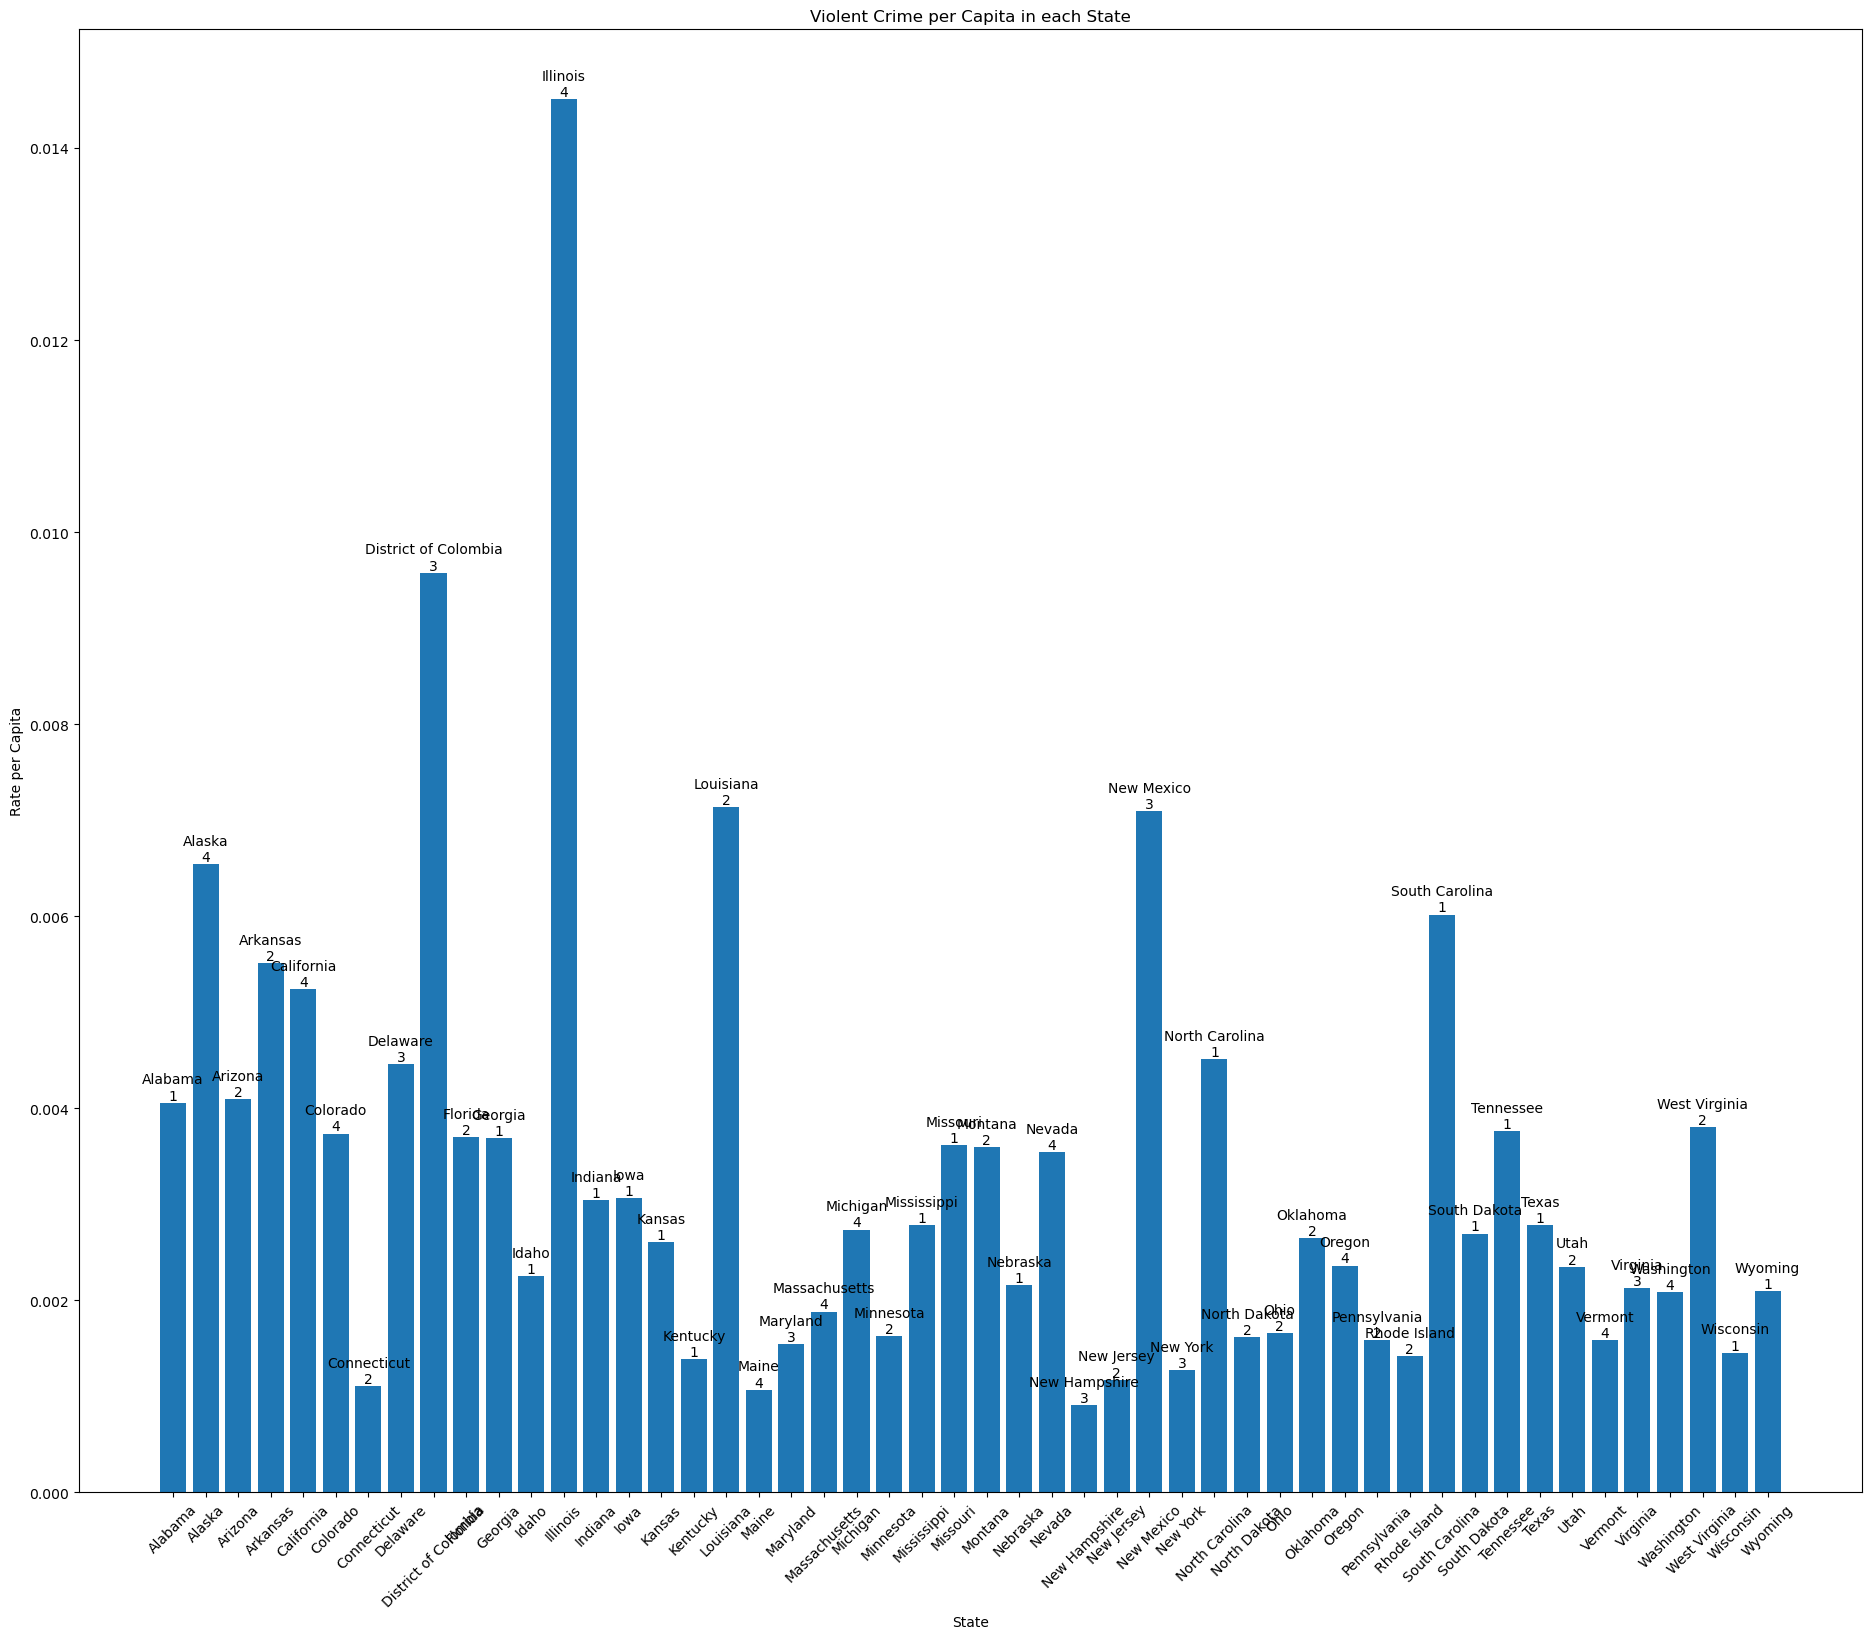

In [66]:

# Plot a bar chart of the rate per capita for a specific type of crime in each state
plt.figure(figsize=(23, 19))

crime_type1 = 'Violent Crime per Capita'

plt.title(f'{crime_type1} in each State')
plt.xlabel('State')
plt.ylabel('Rate per Capita')
plt.xticks(rotation=45)
plt.bar(merged_table_df['State'], merged_table_df[crime_type1])

# Add a label for each state with its Legal Status Code
for i in range(len(merged_table_df)):
    plt.text(x=merged_table_df.index[i], y=merged_table_df.iloc[i][crime_type1], 
             s=f"{merged_table_df.iloc[i]['State']}\n{merged_table_df.iloc[i]['Legal Status Code']}", 
             ha='center', va='bottom')

plt.show()


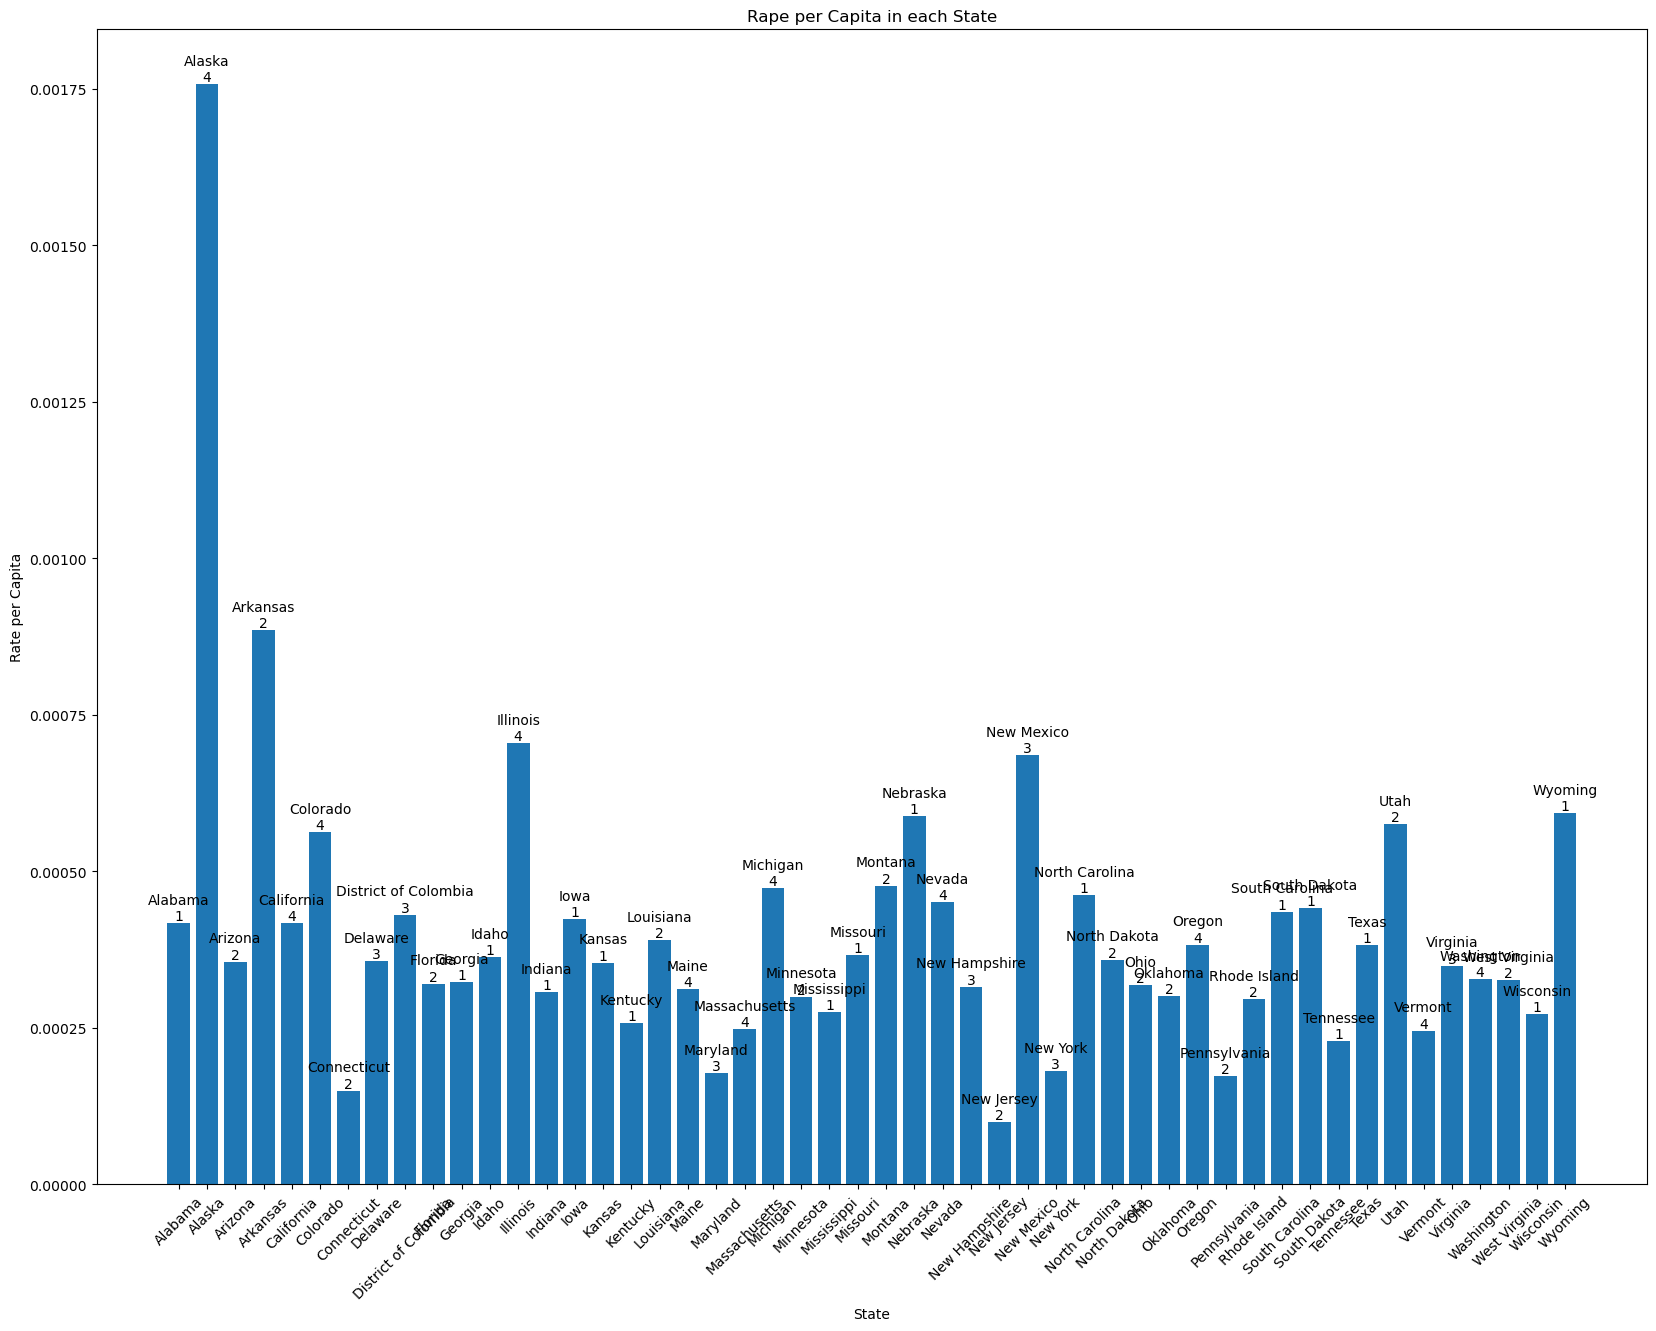

In [67]:
# Plot a bar chart of the rate per capita for a specific type of crime in each state
plt.figure(figsize=(20, 15))

crime_type2 = 'Rape per Capita'

plt.title(f'{crime_type2} in each State')
plt.xlabel('State')
plt.ylabel('Rate per Capita')
plt.xticks(rotation=45)
plt.bar(merged_table_df['State'], merged_table_df[crime_type2])

# Add a label for each state with its Legal Status Code
for i in range(len(merged_table_df)):
    plt.text(x=merged_table_df.index[i], y=merged_table_df.iloc[i][crime_type2], 
             s=f"{merged_table_df.iloc[i]['State']}\n{merged_table_df.iloc[i]['Legal Status Code']}", 
             ha='center', va='bottom')

plt.show()

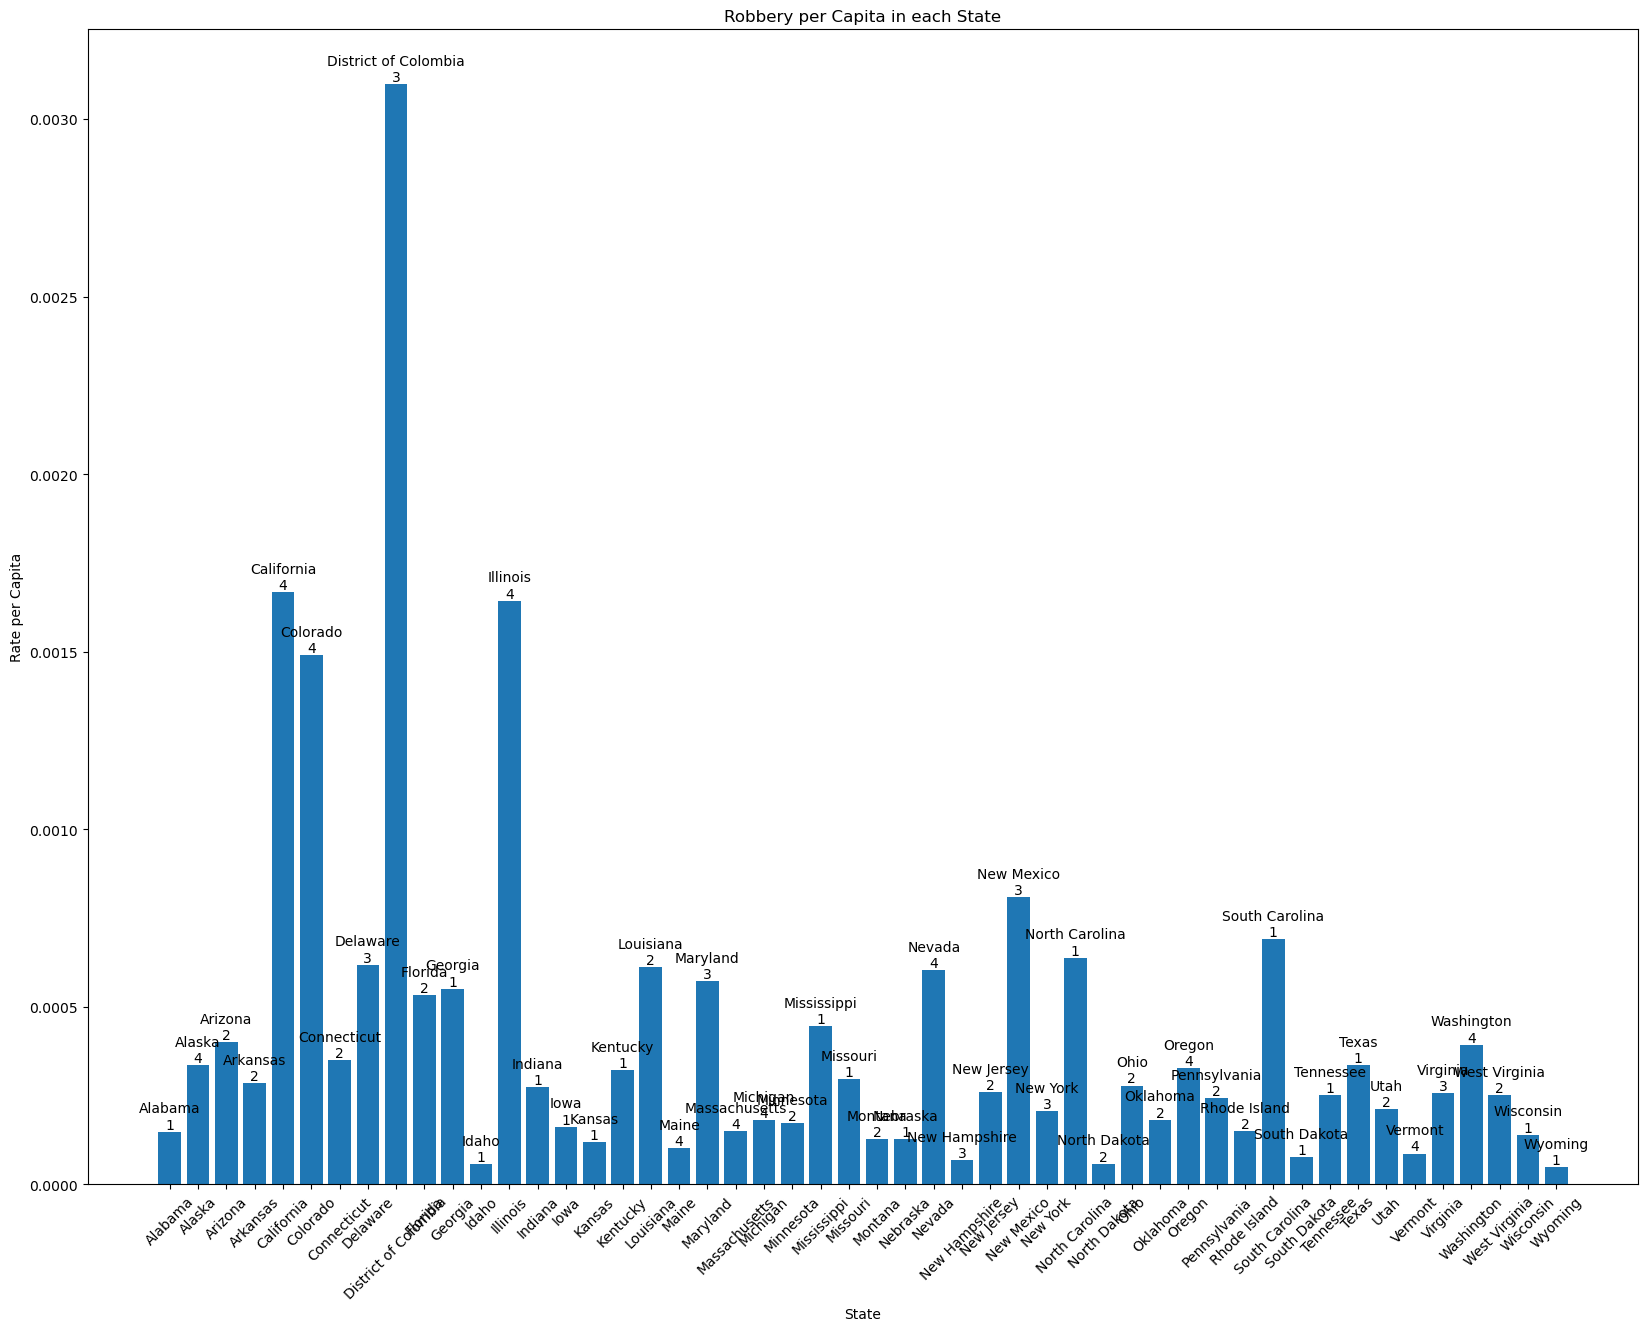

In [68]:
# Plot a bar chart of the rate per capita for a specific type of crime in each state
plt.figure(figsize=(20, 15))

crime_type3 = 'Robbery per Capita'

plt.title(f'{crime_type3} in each State')
plt.xlabel('State')
plt.ylabel('Rate per Capita')
plt.xticks(rotation=45)
plt.bar(merged_table_df['State'], merged_table_df[crime_type3])

# Add a label for each state with its Legal Status Code
for i in range(len(merged_table_df)):
    plt.text(x=merged_table_df.index[i], y=merged_table_df.iloc[i][crime_type3], 
             s=f"{merged_table_df.iloc[i]['State']}\n{merged_table_df.iloc[i]['Legal Status Code']}", 
             ha='center', va='bottom')

plt.show()

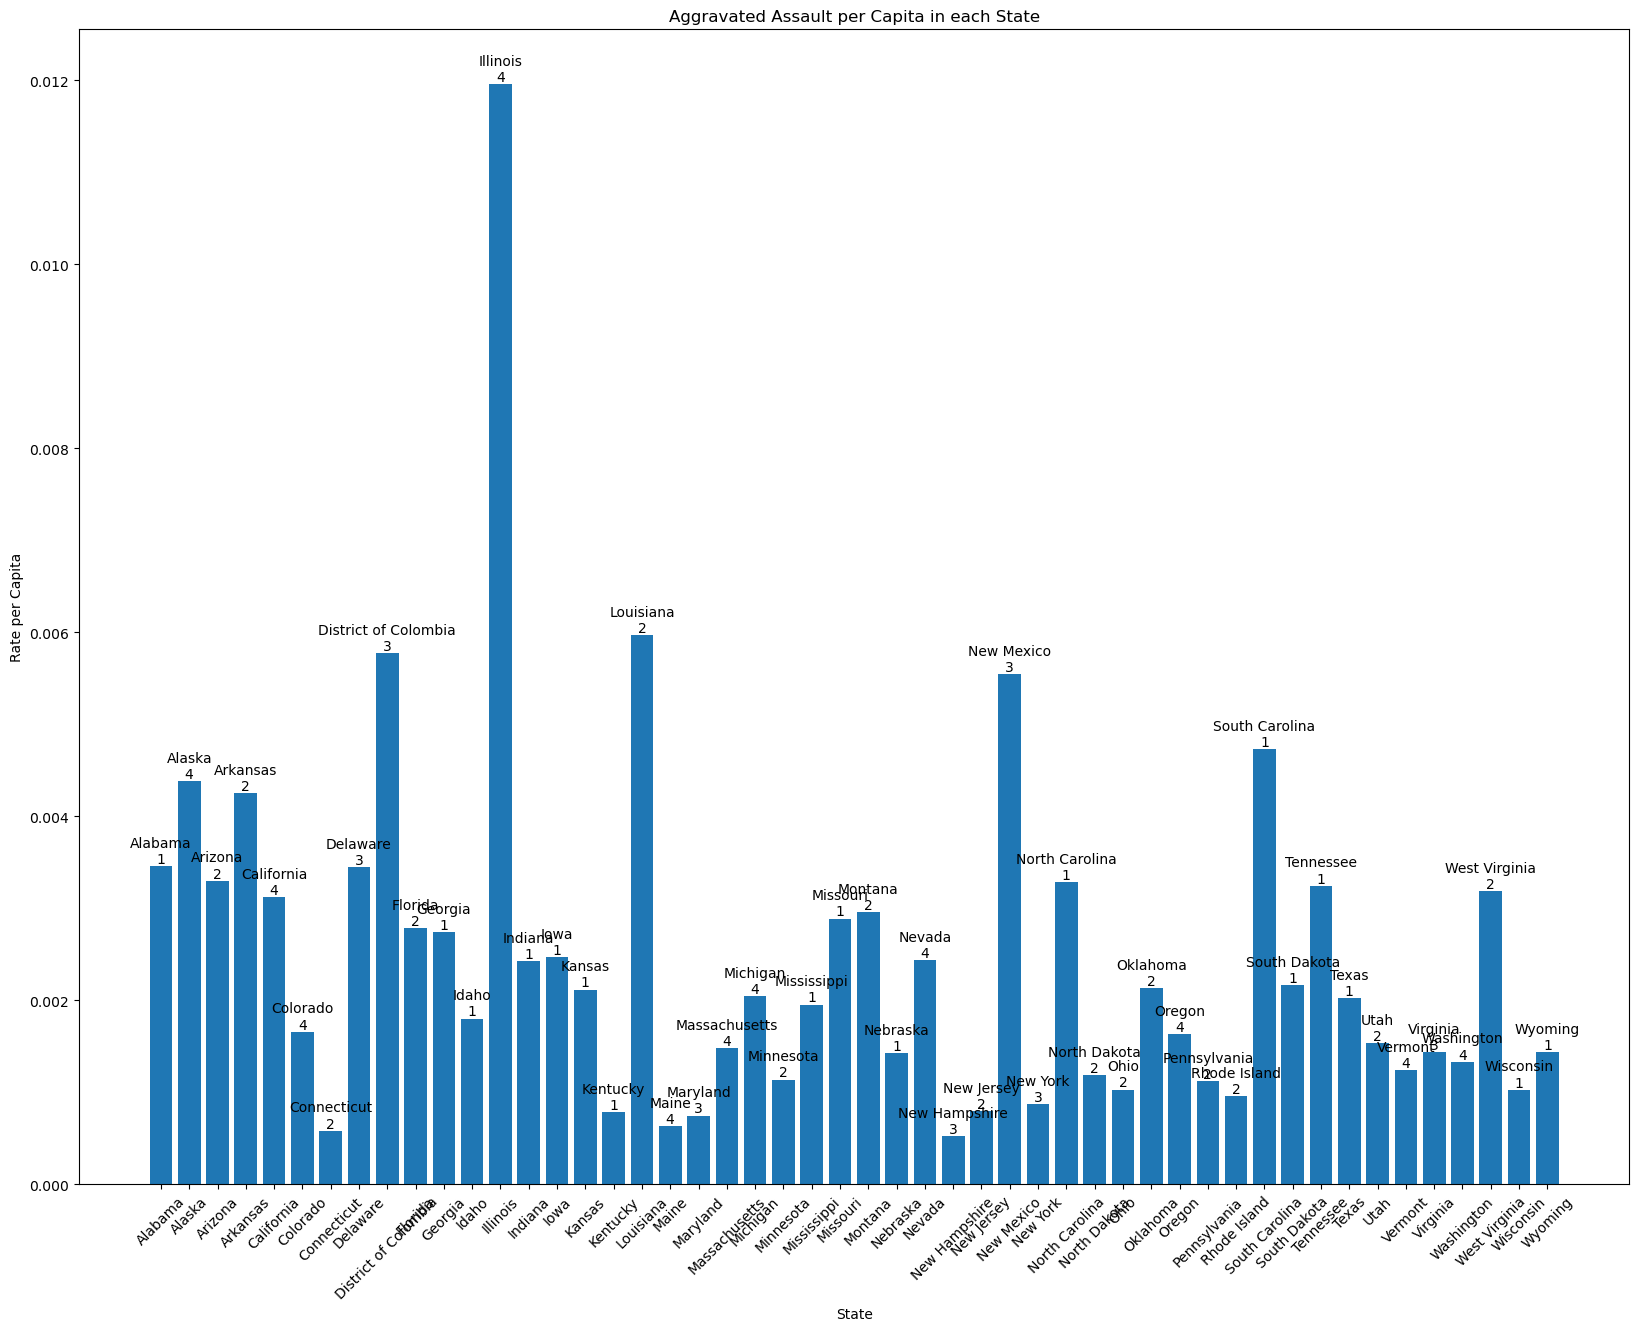

In [69]:
# Plot a bar chart of the rate per capita for a specific type of crime in each state
plt.figure(figsize=(20, 15))

crime_type4 = 'Aggravated Assault per Capita'

plt.title(f'{crime_type4} in each State')
plt.xlabel('State')
plt.ylabel('Rate per Capita')
plt.xticks(rotation=45)
plt.bar(merged_table_df['State'], merged_table_df[crime_type4])

# Add a label for each state with its Legal Status Code
for i in range(len(merged_table_df)):
    plt.text(x=merged_table_df.index[i], y=merged_table_df.iloc[i][crime_type4], 
             s=f"{merged_table_df.iloc[i]['State']}\n{merged_table_df.iloc[i]['Legal Status Code']}", 
             ha='center', va='bottom')

plt.show()

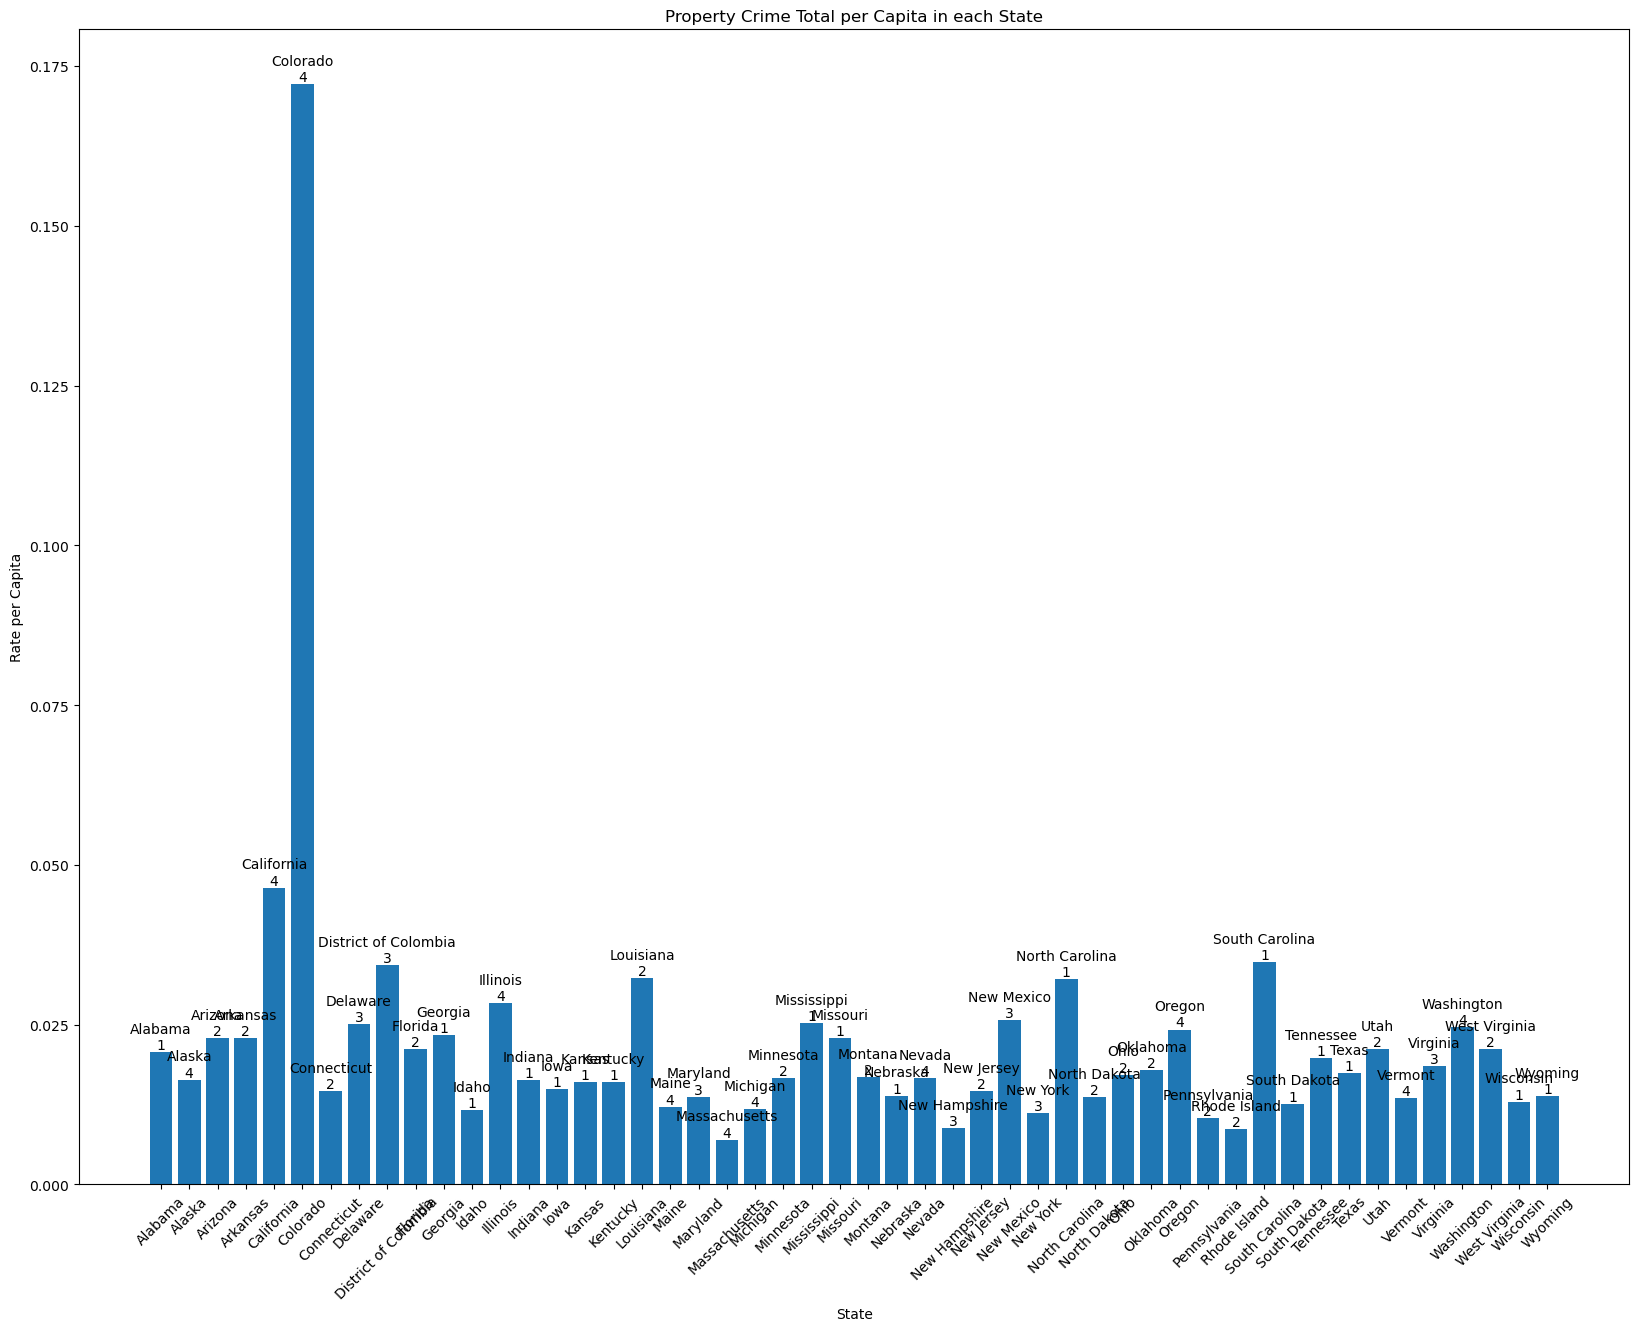

In [70]:
# Plot a bar chart of the rate per capita for a specific type of crime in each state
plt.figure(figsize=(20, 15))

crime_type5 = 'Property Crime Total per Capita'

plt.title(f'{crime_type5} in each State')
plt.xlabel('State')
plt.ylabel('Rate per Capita')
plt.xticks(rotation=45)
plt.bar(merged_table_df['State'], merged_table_df[crime_type5])

# Add a label for each state with its Legal Status Code
for i in range(len(merged_table_df)):
    plt.text(x=merged_table_df.index[i], y=merged_table_df.iloc[i][crime_type5], 
             s=f"{merged_table_df.iloc[i]['State']}\n{merged_table_df.iloc[i]['Legal Status Code']}", 
             ha='center', va='bottom')

plt.show()

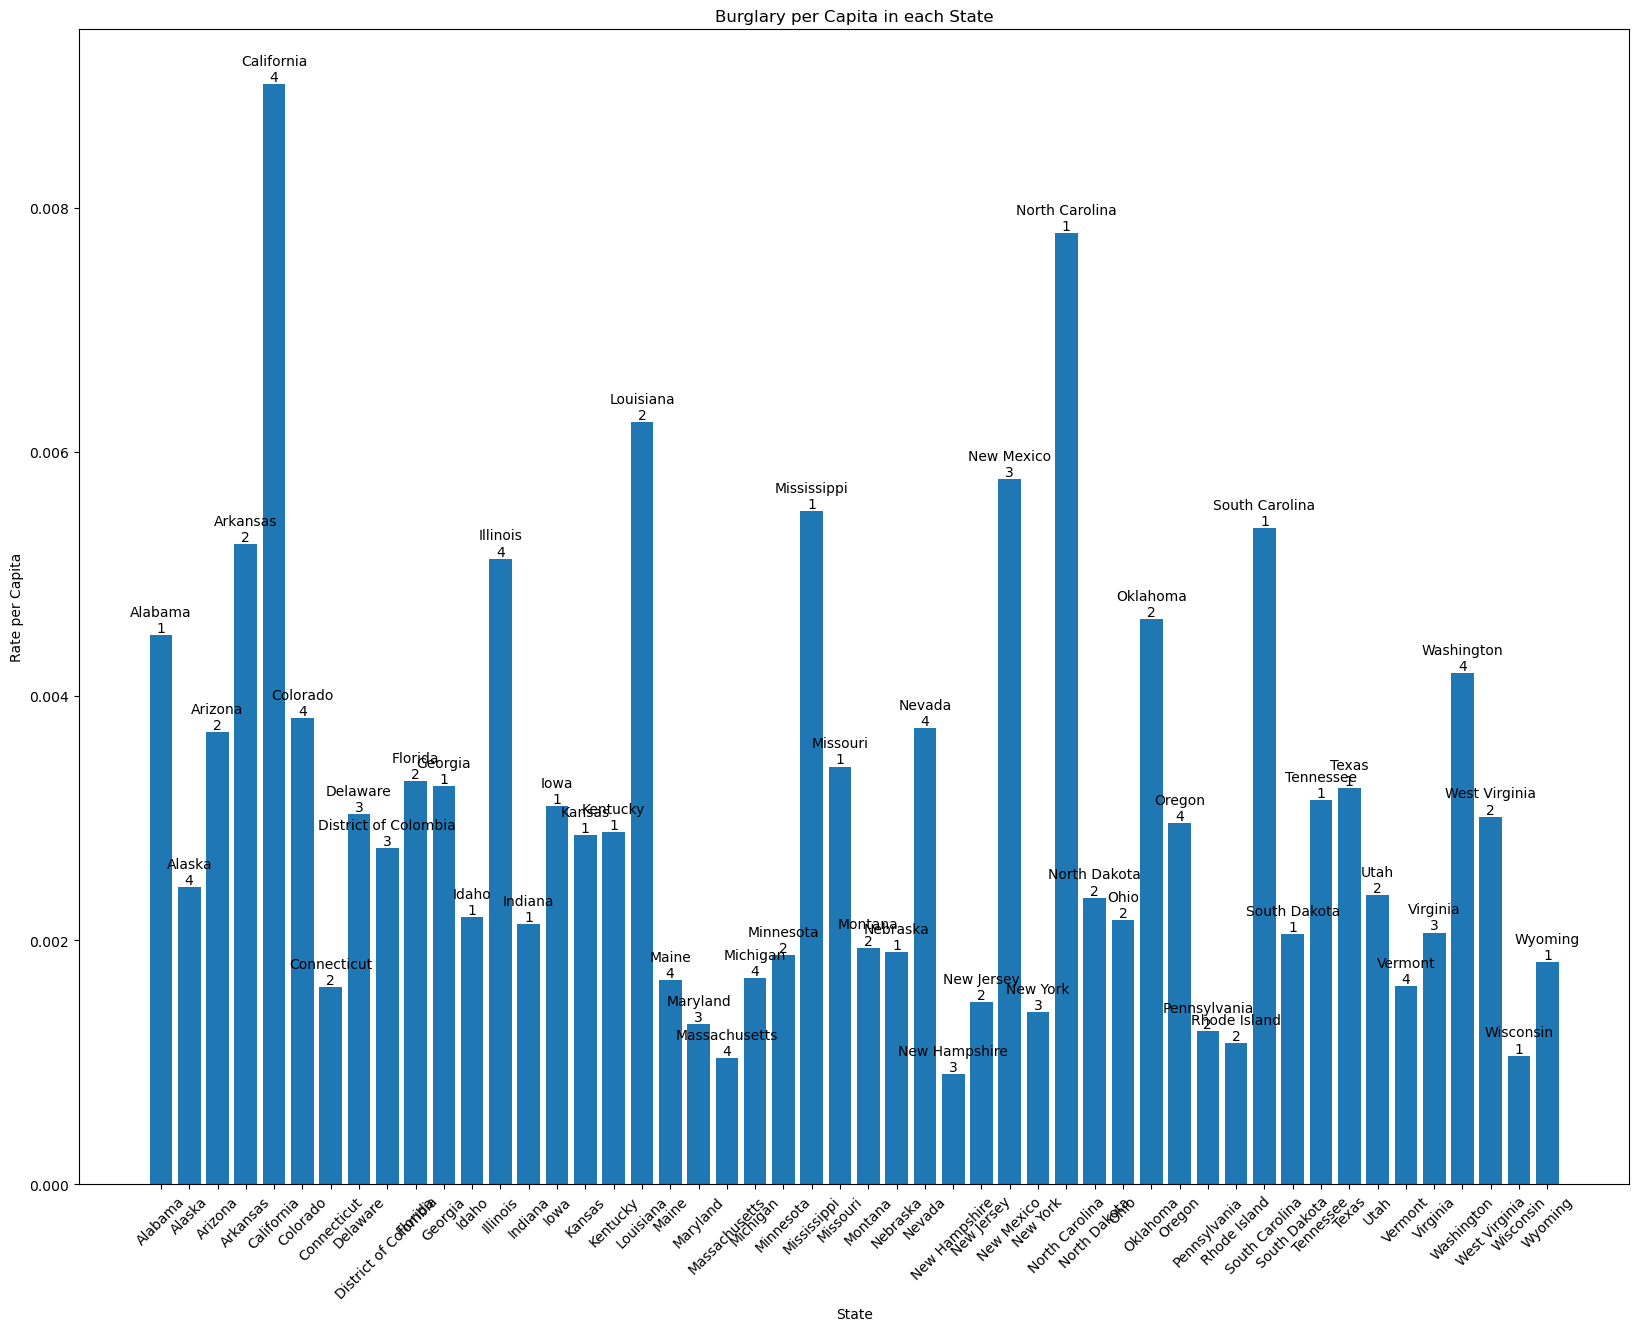

In [71]:
# Plot a bar chart of the rate per capita for a specific type of crime in each state
plt.figure(figsize=(20, 15))

crime_type6 = 'Burglary per Capita'

plt.title(f'{crime_type6} in each State')
plt.xlabel('State')
plt.ylabel('Rate per Capita')
plt.xticks(rotation=45)
plt.bar(merged_table_df['State'], merged_table_df[crime_type6])

# Add a label for each state with its Legal Status Code
for i in range(len(merged_table_df)):
    plt.text(x=merged_table_df.index[i], y=merged_table_df.iloc[i][crime_type6], 
             s=f"{merged_table_df.iloc[i]['State']}\n{merged_table_df.iloc[i]['Legal Status Code']}", 
             ha='center', va='bottom')

plt.show()

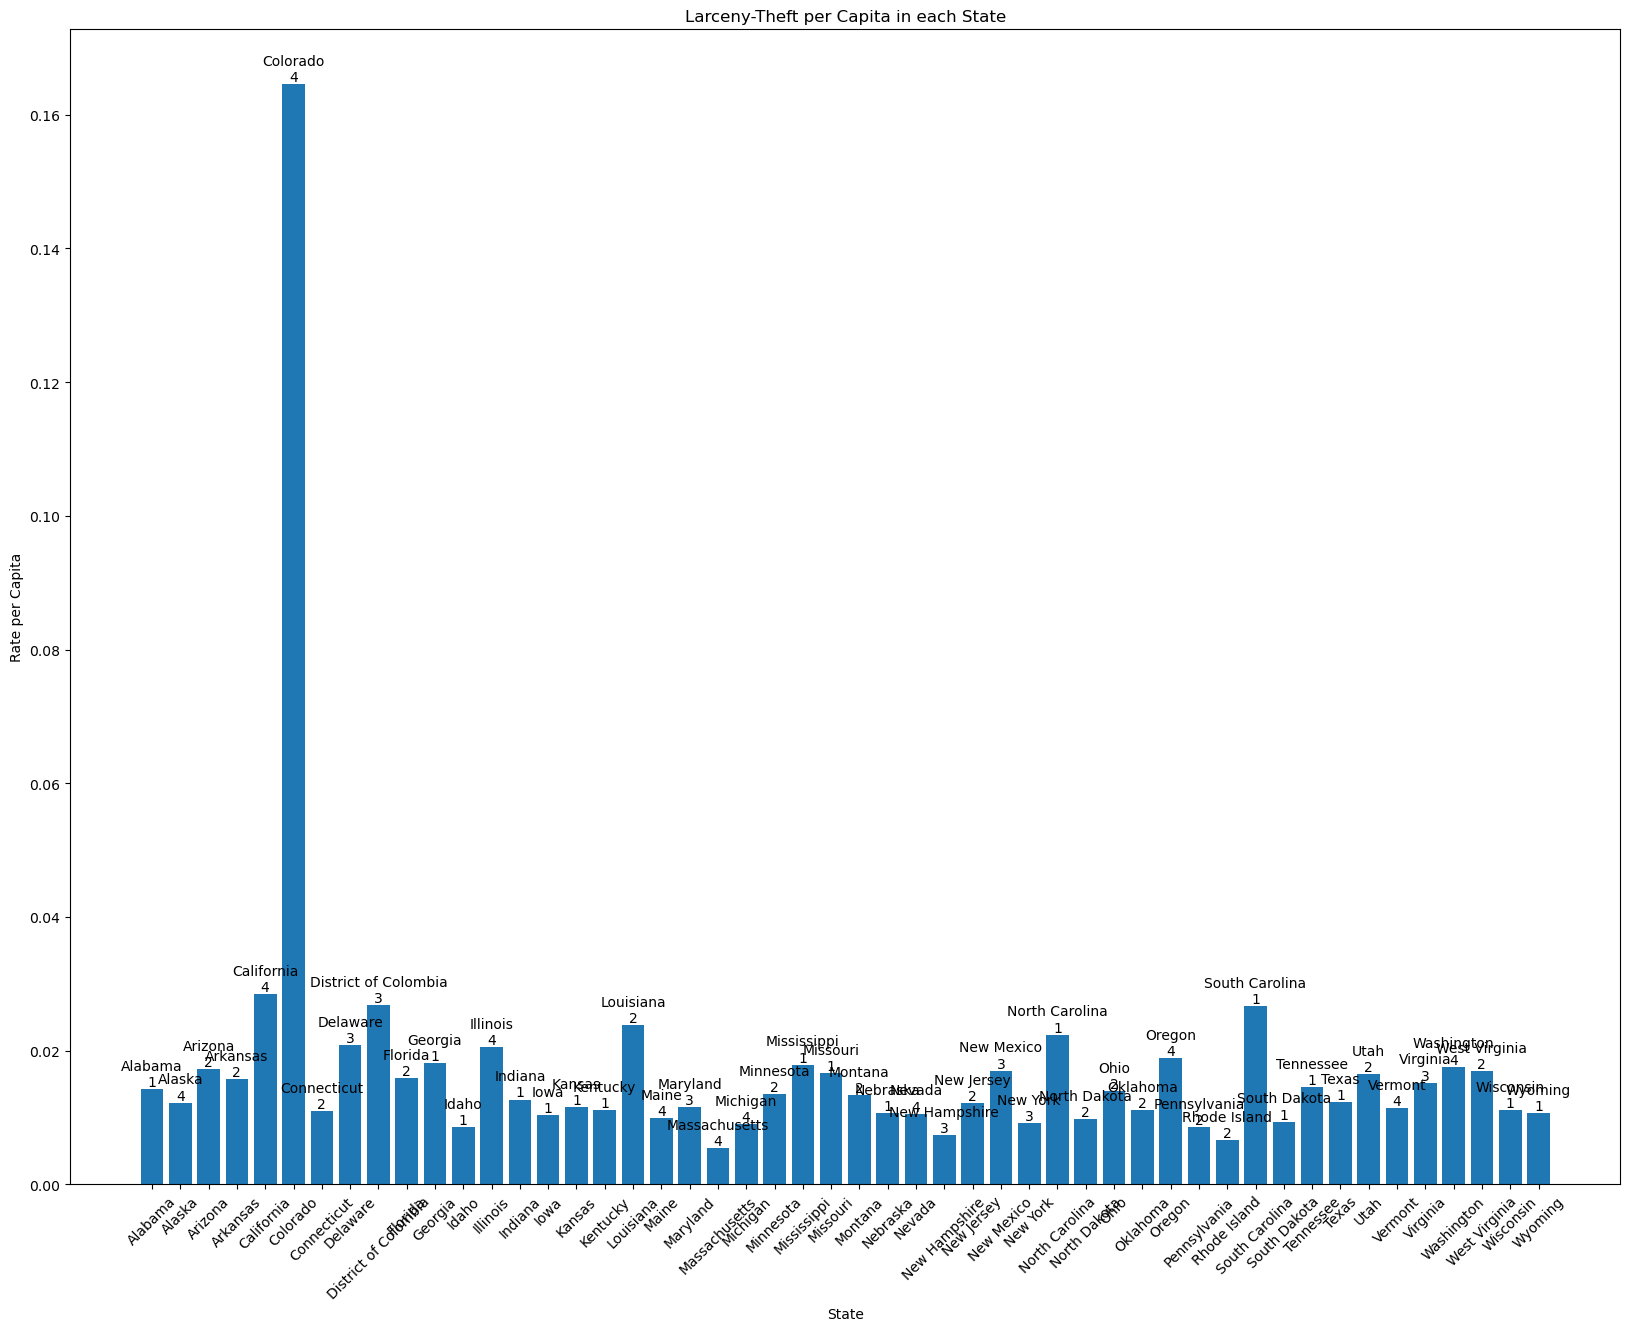

In [72]:
# Plot a bar chart of the rate per capita for a specific type of crime in each state
plt.figure(figsize=(20, 15))

crime_type7 = 'Larceny-Theft per Capita'

plt.title(f'{crime_type7} in each State')
plt.xlabel('State')
plt.ylabel('Rate per Capita')
plt.xticks(rotation=45)
plt.bar(merged_table_df['State'], merged_table_df[crime_type7])

# Add a label for each state with its Legal Status Code
for i in range(len(merged_table_df)):
    plt.text(x=merged_table_df.index[i], y=merged_table_df.iloc[i][crime_type7], 
             s=f"{merged_table_df.iloc[i]['State']}\n{merged_table_df.iloc[i]['Legal Status Code']}", 
             ha='center', va='bottom')

plt.show()

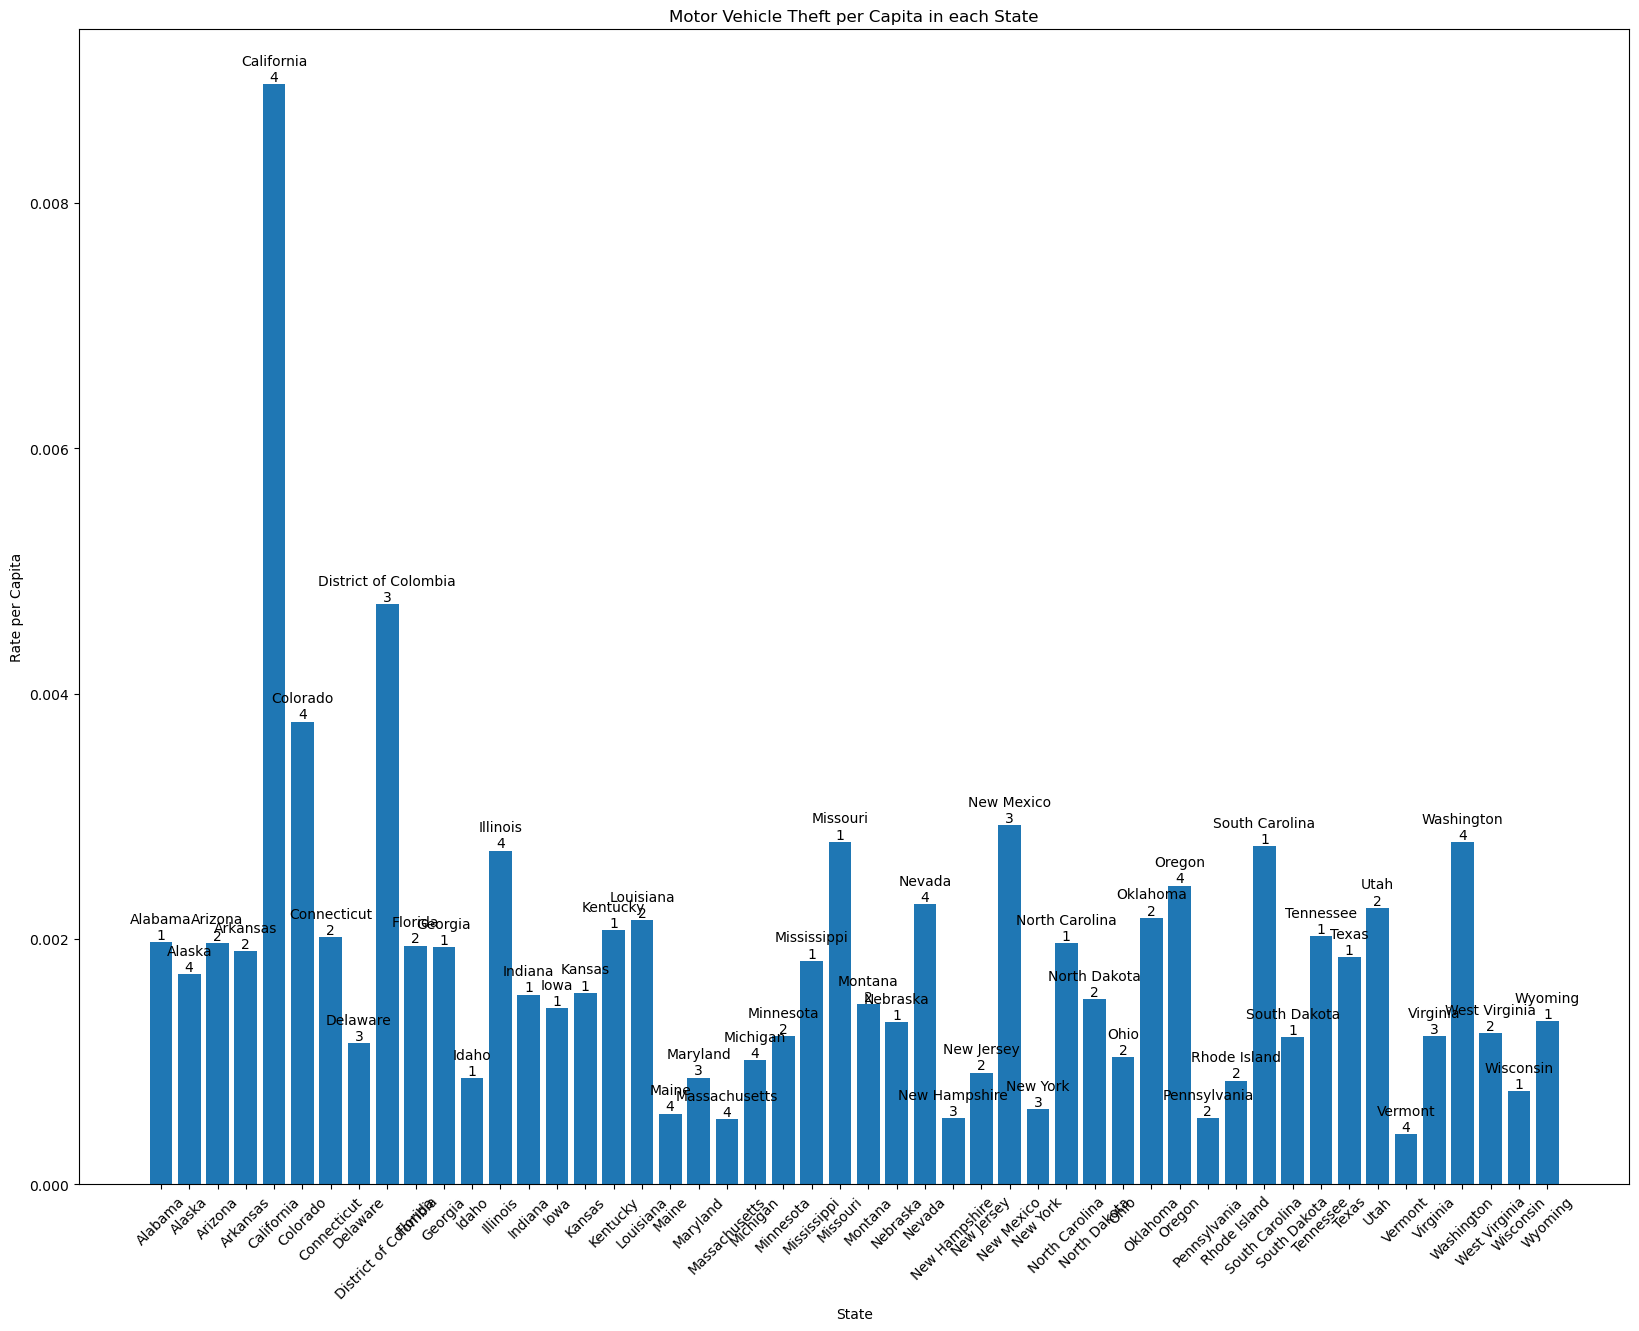

In [73]:
# Plot a bar chart of the rate per capita for a specific type of crime in each state
plt.figure(figsize=(20, 15))

crime_type8 = 'Motor Vehicle Theft per Capita'

plt.title(f'{crime_type8} in each State')
plt.xlabel('State')
plt.ylabel('Rate per Capita')
plt.xticks(rotation=45)

plt.bar(merged_table_df['State'], merged_table_df[crime_type8])

# Add a label for each state with its Legal Status Code
for i in range(len(merged_table_df)):
    plt.text(x=merged_table_df.index[i], y=merged_table_df.iloc[i][crime_type8], 
             s=f"{merged_table_df.iloc[i]['State']}\n{merged_table_df.iloc[i]['Legal Status Code']}", 
             ha='center', va='bottom')

plt.show()

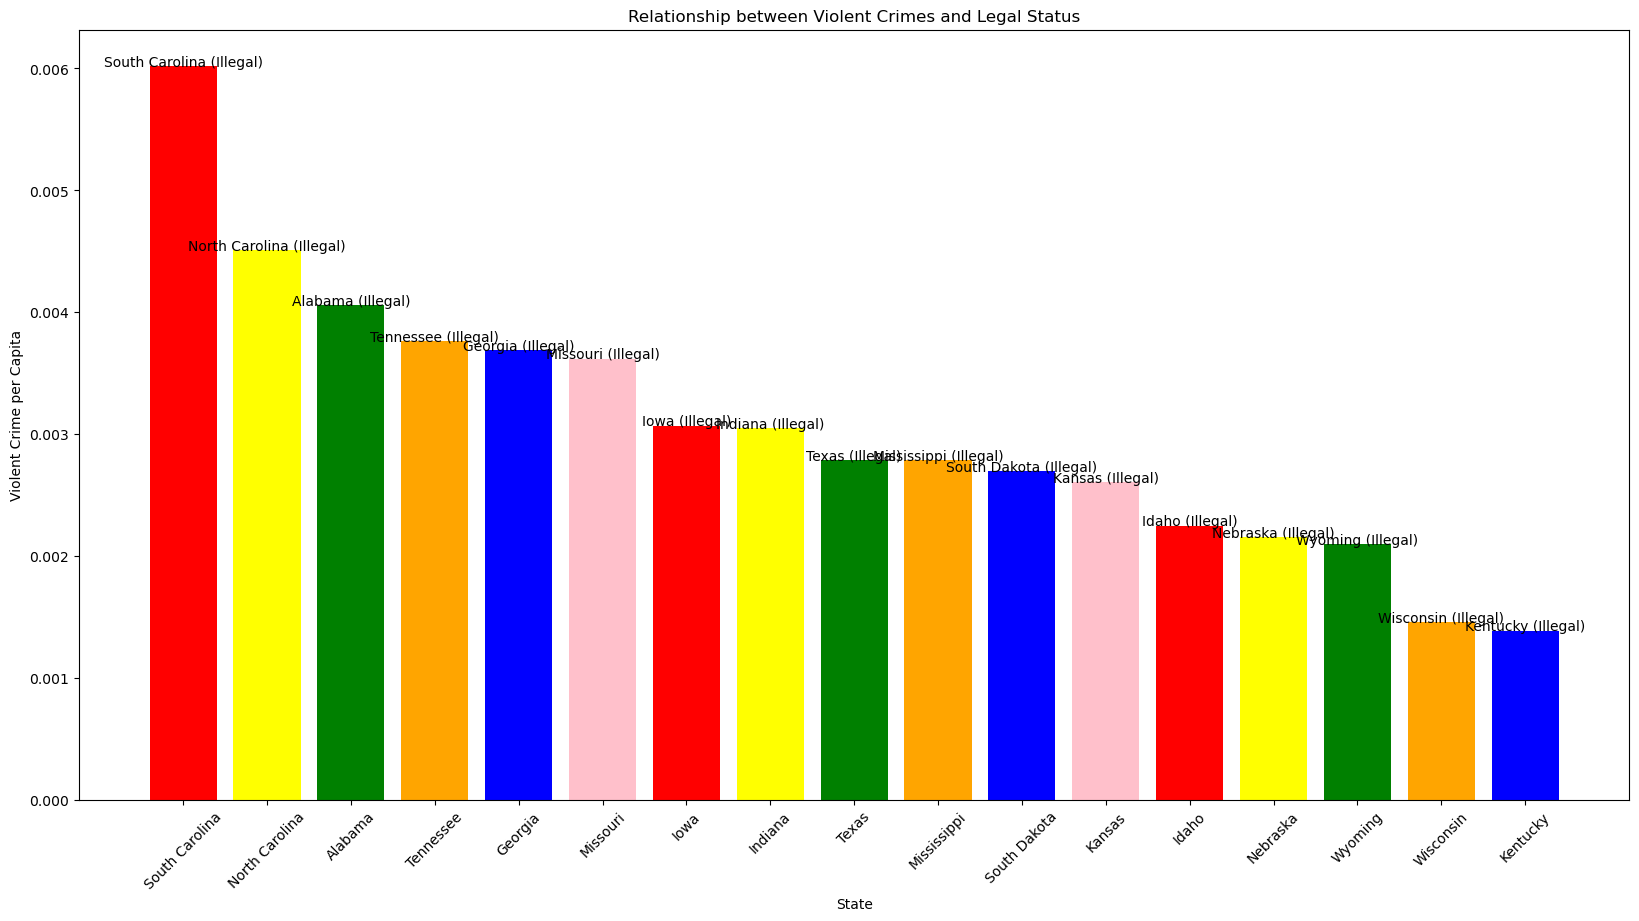

In [74]:
#Plot bar graph demostrating relationship between State, Legal status and Type of Crime:

# select only the columns you need
vc_df = merged_table_df[["State", "Legal Status", "Violent Crime per Capita"]]

# group the data by state and legal status
grouped_state_code1 = vc_df.groupby(["State", "Legal Status"]).sum()

# reset the index to make the state and legal status code columns again
grouped_state_code1 = grouped_state_code1.reset_index()

# filter the data for a specific legal status code
legal_status = 'Illegal'
grouped_state_code1 = grouped_state_code1[grouped_state_code1["Legal Status"] == legal_status]

# sort the data by the crime rate
grouped_state_code1 = grouped_state_code1.sort_values(by="Violent Crime per Capita", ascending=False)

# plot the data
colors = ['Red', 'Yellow', 'Green', 'Orange', 'Blue', 'Pink']

plt.figure(figsize=(20, 10)) # increase the size of the figure

plt.bar(grouped_state_code1["State"], grouped_state_code1["Violent Crime per Capita"], color=colors)

# add the text labels
for i, row in grouped_state_code1.iterrows():
    plt.text(row["State"], row["Violent Crime per Capita"], f"{row['State']} ({row['Legal Status']})", ha='center')

# add title and labels
plt.title("Relationship between Violent Crimes and Legal Status")
plt.xlabel("State")
plt.ylabel("Violent Crime per Capita")

plt.xticks(rotation=45) # rotate the x-axis labels by 45 degrees

# show the plot
plt.show()

In [75]:
#This line of code will allow you to select the type of crime and the legal status.

def plot_crime_by_legal_status(df, crime_type, legal_status):
    # select only the columns you need
    crime_df = df[["State", "Legal Status", crime_type + " per Capita"]]
    
    # group the data by state and legal status
    grouped_state_code = crime_df.groupby(["State", "Legal Status"]).sum()
    
    # reseting the index to make the state and legal status code columns again
    grouped_state_code = grouped_state_code.reset_index()
    
    # filtering the data for a specific legal status
    grouped_state_code = grouped_state_code[grouped_state_code["Legal Status"] == legal_status]
    
    # sorting the data by the crime rate
    grouped_state_code = grouped_state_code.sort_values(by=crime_type + " per Capita", ascending=False)
    
    # plot
    colors = ['Red', 'Yellow', 'Green', 'Orange', 'Blue', 'Indigo']

    plt.figure(figsize=(20, 10)) # increase the size of the figure

    plt.bar(grouped_state_code["State"], grouped_state_code[crime_type + " per Capita"], color=colors)

    # add the text labels
    for i, row in grouped_state_code.iterrows():
        plt.text(row["State"], row[crime_type + " per Capita"], f"{row['State']} ({row['Legal Status']})", ha='center')

    # add title and labels
    plt.title("Relationship between " + crime_type + " and Legal Status")
    plt.xlabel("State")
    plt.ylabel(crime_type + " per Capita")

    plt.xticks(rotation=45) # rotate the x-axis labels by 45 degrees for further visibility and seperation.

    # show the plot
    plt.show()


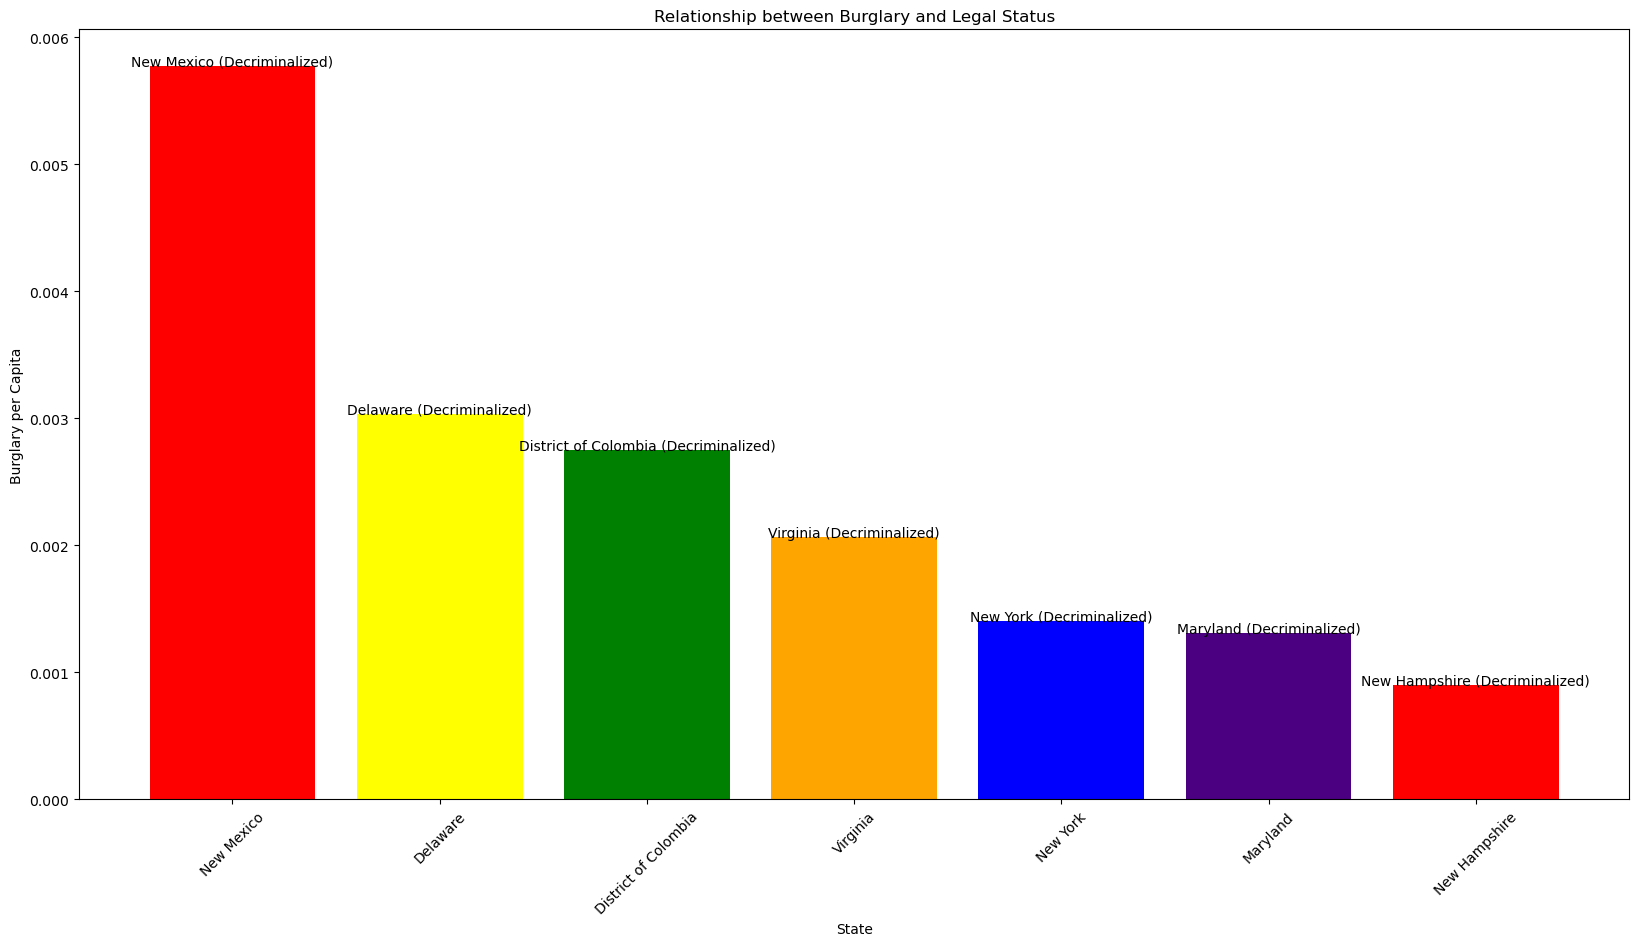

In [76]:
#Line of Query: Just tyoe the type of crime and the legal status and it'll show a graph.
plot_crime_by_legal_status(merged_table_df, "Burglary", "Decriminalized")